In [113]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

## 1.1 

### LASSO regression to predict Salary 

In [2]:
# read numeric columns only
hitters_data = pd.read_csv("Hitters.csv").select_dtypes(include=np.number)

In [3]:
# test there are only numerica columns left
print (hitters_data.head())

   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
0    293    66      1    30   29     14      1     293     66       1     30   
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    321    87     10    39   42     30      2     396    101      12     48   

   CRBI  CWalks  PutOuts  Assists  Errors  Salary  
0    29      14      446       33      20     NaN  
1   414     375      632       43      10   475.0  
2   266     263      880       82      14   480.0  
3   838     354      200       11       3   500.0  
4    46      33      805       40       4    91.5  


In [4]:
# drop NA
hitters_data = hitters_data.dropna()

In [5]:
# test there are no NA values left
print (hitters_data.head())

   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    321    87     10    39   42     30      2     396    101      12     48   
5    594   169      4    74   51     35     11    4408   1133      19    501   

   CRBI  CWalks  PutOuts  Assists  Errors  Salary  
1   414     375      632       43      10   475.0  
2   266     263      880       82      14   480.0  
3   838     354      200       11       3   500.0  
4    46      33      805       40       4    91.5  
5   336     194      282      421      25   750.0  


In [6]:
# get training data and target
X = hitters_data.iloc[:,:-1]
y = hitters_data.iloc[:,-1]

In [112]:
# Here we will do 2 things. 
# First, Create a visualization of the coefficient trajectories. Comment on which are the final three predictors
# Then we will print out the bias and variance when all predictors remain and when final three predictors remain
alphas = np.logspace(-10, 10, 500)
coefs = []
found = False
for alpha in alphas:
    clf = linear_model.Lasso(alpha, normalize=True, max_iter = 10000)
    clf.fit(X, y)
    coefs.append(clf.coef_)
    feature_index = []
    for i in range(len(clf.coef_)):
        if clf.coef_[i] != 0:
            feature_index.append(i)
    if not found and len(feature_index) == 3:
        y_pred = clf.predict(X)
        print("Mean squared error while 3 predictors remain: %.2f"
      % mean_squared_error(y, y_pred))
        # variance
        print('Variance score while 3 predictors remain: %.2f' % r2_score(y, y_pred))
        print ("alpha while 3 predictors remain: "+str(alpha))
        print ("the final three predictors that remain in the model are "+list(X)[0], list(X)[1], list(X)[2])
        found = True

Mean squared error while 3 predictors remain: 163994.49
Variance score while 3 predictors remain: 0.19
alpha while 3 predictors remain: 10.520686710236228
the final three predictors that remain in the model are AtBat Hits HmRun


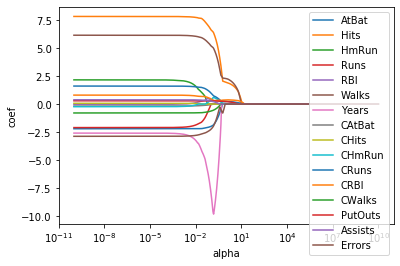

In [74]:
# Create a visualization of the coefficient trajectories
fig, ax = plt.subplots()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('coef')
plt.legend(list(X))

### Cross Validation

In [79]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split

In [99]:
reg = LassoCV(cv=10, normalize=True, max_iter = 10000, random_state=0).fit(X, y)
y_pred = reg.predict(X)

In [100]:
# bias
print("Mean squared error: %.2f"
      % mean_squared_error(y, y_pred))
# variance
print('Variance score: %.2f' % r2_score(y, y_pred))

Mean squared error: 96243.09
Variance score: 0.53


In [82]:
# find the optimal value of the regularization penality.
opt_alpha = reg.alpha_
print ("the optimal value is "+str(opt_alpha))

the optimal value is 0.0635481759985745


In [83]:
# Get the predictors that are left in the model
columns_names = X.columns
coefs = reg.coef_
features = []
for i in range(len(coefs)):
    if coefs[i] != 0:
        features.append(columns_names[i])
print ("There are "+str(len(features)) +" models left for the cross validation method and they are ")
print (features)

There are 14 models left for the cross validation method and they are 
['AtBat', 'Hits', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors']


## 1.2 

### Ridge Regression prediciton and visualization

In [84]:
alphas = np.logspace(-10, 10, 500)
coefs = []
found = False
for alpha in alphas:
    clf = linear_model.Ridge(alpha, normalize=True, max_iter = 10000)
    clf.fit(X, y)
    coefs.append(clf.coef_)

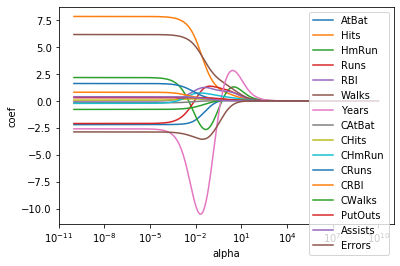

In [85]:
# Visualize coeffecient trajectories
fig, ax = plt.subplots()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('coef')
plt.legend(list(X))

### cross validation

In [91]:
from sklearn.linear_model import RidgeCV

In [92]:
reg = RidgeCV(alphas=alphas, cv=10, normalize=True).fit(X, y)
y_pred = reg.predict(X_test)

/Users/yl947/anaconda3/envs/my_env/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [93]:
opt_alpha = reg.alpha_
print ("the optimal value is "+str(opt_alpha))

the optimal value is 0.9549044557518078


# 2

#### Explain in your own words the bias-variance tradeoff. 

Answer: Bias is defined as the difference between model prediction value and actual value. It is used to test if the model is generalized well or not. Variance means the variability of model prediction and tells how data is spread. Ideally we want a model that can train our data well with low variance (not underfitting) and can be generalized to other data (not overfitting). But this is usually a dilemma and what we can do is to find a balance for which we have a relatively low bias and variance

#### What role does regularization play in this tradeoff? Make reference to your findings in number (1) to describe models of high/low bias and variance.

In [126]:
# Here we will try different alphas to test the bias variance relationship with alpha
biases = []
variances = []
alphas = np.logspace(-2, 2, 10)
biases = []
variances = []
for alpha in alphas:
    clf = linear_model.Lasso(alpha, normalize=True, max_iter = 10000)
    clf.fit(X, y)
    y_pred = clf.predict(X)
    biases.append(mean_squared_error(y, y_pred))
    variances.append(r2_score(y, y_pred))

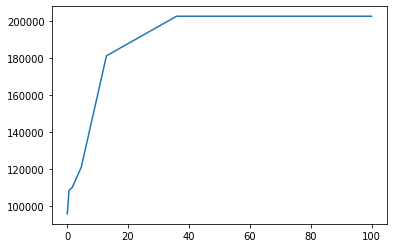

In [127]:
plt.plot(alphas, biases)

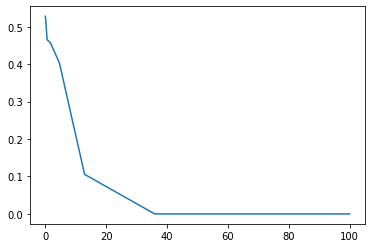

In [128]:
plt.plot(alphas, variances)

Answer: as we can see from above, the large alpha, the larger bias and the smaller variance. And this is the reason why we need regularization. We want an optimal alpha with which we can get both of a relatively low bias and variance. And with regularization penalty, we can make sure we wouldn't get our model to be overfitting or underfitting too much.